# Capstone Project: Credit card fraud detection using ML
# Understanding data

In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from datetime import datetime, date
from pylab import rcParams
import seaborn as sns
import haversine as hs
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [28]:
# load the data
fraudtest = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')
fraudtrain = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')

# drop the unnamed column
fraudtest.drop('Unnamed: 0', axis=1, inplace=True)
fraudtrain.drop('Unnamed: 0', axis=1, inplace=True)

# concanate both 
data = pd.concat([fraudtrain,fraudtest])

In [29]:
def dataset_overview(df):
    display(df.head())
    variables = df.shape[1]
    observations = df.shape[0]
    missings = df.isnull().sum().sum()
    missings_per = round(100 * df.isnull().sum().sum()/len(df),3)
    duplicated = df.duplicated().sum()
    duplicated_per = round(100 * df.duplicated().sum()/len(df),3)
    categ = len(df.select_dtypes(include=[np.number]).columns.values)
    numer = len(df.select_dtypes(exclude=[np.number]).columns.values)
    #names = ['Variables', 'Observations', 'Missings cells', 'Missing cells(%)','Duplicated rows','Duplicated rows(%)','Num cols','Categ cols']
    stats = list([variables, observations, missings, missings_per,duplicated,duplicated_per, categ, numer])
    over_df = pd.DataFrame({'General Overview':['Variables', 'Observations', 'Missings cells', 'Missing cells(%)','Duplicated rows','Duplicated rows(%)','Num cols','Categ cols'],
                           '': stats})
    over_df = over_df.set_index('General Overview')
    print(over_df)
        #################### categorical columns  ###############################################################
    print('\nVariable overview\n')
    print('Categorical variables')
    for x in list(data.select_dtypes(exclude=[np.number]).columns.values):
        print(x,'\n')
        print(f'unique values:         {len(df[x].unique())}')
        print(f'Missing values:        {df[x].isnull().sum()}')
        print(f'Missing values(%):     {df[x].isnull().sum()/len(data[x])}%')
        print(f'Mode:                  {df[x].mode()[0]}')
        print(f'Frequency:             {df[x].value_counts()[0]}\n')
        print(f'Data type:             {df[x].dtype}')
    
    #################### numerical columns  ###############################################################
    print('\nNumerical variables\n')
    for y in list(data.select_dtypes(include=[np.number]).columns.values):
        print(y,'\n')
        print(f'unique values:     {len(df[x].unique())}')
        print(f'Missing values:    {df[y].isnull().sum()}')
        print(f'Missing values(%): {df[y].isnull().sum()/len(data[y])}%')
        print(f'Minimum:           {df[y].min()}')
        print(f'Median:            {df[y].median()}')
        print(f'Mean:              {df[y].mean()}')
        print(f'Max:               {df[y].max()}')
        print(f'Data type:         {df[x].dtype}')

In [30]:
dataset_overview(data)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


                             
General Overview             
Variables                22.0
Observations        1852394.0
Missings cells            0.0
Missing cells(%)          0.0
Duplicated rows           0.0
Duplicated rows(%)        0.0
Num cols                 10.0
Categ cols               12.0

Variable overview

Categorical variables
trans_date_trans_time 

unique values:         1819551
Missing values:        0
Missing values(%):     0.0%
Mode:                  2019-04-22 16:02:01
Frequency:             4

Data type:             object
merchant 

unique values:         693
Missing values:        0
Missing values(%):     0.0%
Mode:                  fraud_Kilback LLC
Frequency:             6262

Data type:             object
category 

unique values:         14
Missing values:        0
Missing values(%):     0.0%
Mode:                  gas_transport
Frequency:             188029

Data type:             object
first 

unique values:         355
Missing values:        0
Missing valu

From the above we can observe that we have 22 columns and 1852394 observations. 

No missing variables, no duplicates, having some data types that doesn't correspond to the variables for example on date columns (trans_date_trans_time and dob).

The next step, will be to change those data types, and create some columns which can help us in our analysis

# Data Cleansing

In [31]:
# Function to calculate the distance between two adress
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [32]:
# clean date of DOB and trans_date_trans_time
dates_list = ['trans_date_trans_time','dob']
for x in dates_list:
    data[x] = pd.to_datetime(data[x])

In [33]:
# get hours from the transaction
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
# days when the transaction occured 
data['day_of_week'] =data['trans_date_trans_time'].dt.day_name()
# period when the transaction occured
data['year_month'] =data['trans_date_trans_time'].dt.to_period('M')
# the age of the client when the transaction occured
data['age'] = (np.round((data['trans_date_trans_time'] - data['dob'])/np.timedelta64(1,'Y')))
# get the full name 
data['names'] = data['first'] + ' ' + data['last']
data.drop(['first','last'], axis=1, inplace=True)
# create the column where the if the population is less than 25% to be rural, 25-50% ssemi-urban, and more than 50% urban
data['residence'] = pd.qcut(data.city_pop, q=[0, .25, .75, 1], labels=['rural', 'semi_urban', 'urban'])

# concanate the lat and longitude of client into one column and the same for the merchant location
data['lat_long'] = tuple(zip(*data[['lat','long']].values.T))
data['merch_ad'] = tuple(zip(*data[['merch_lat','merch_long']].values.T))

In [34]:
# create the distance column
data['distance'] = haversine_vectorize(data['long'],data['lat'],data['merch_long'],data['merch_lat'])

# Exploratory Data Analysis (EDA)
## Univariate Analysis

In [35]:
# Distribution graphs (histogram/bar graph) of column data
def plotDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 30]] # For displaying purposes, pick columns that have between 1 and 30 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

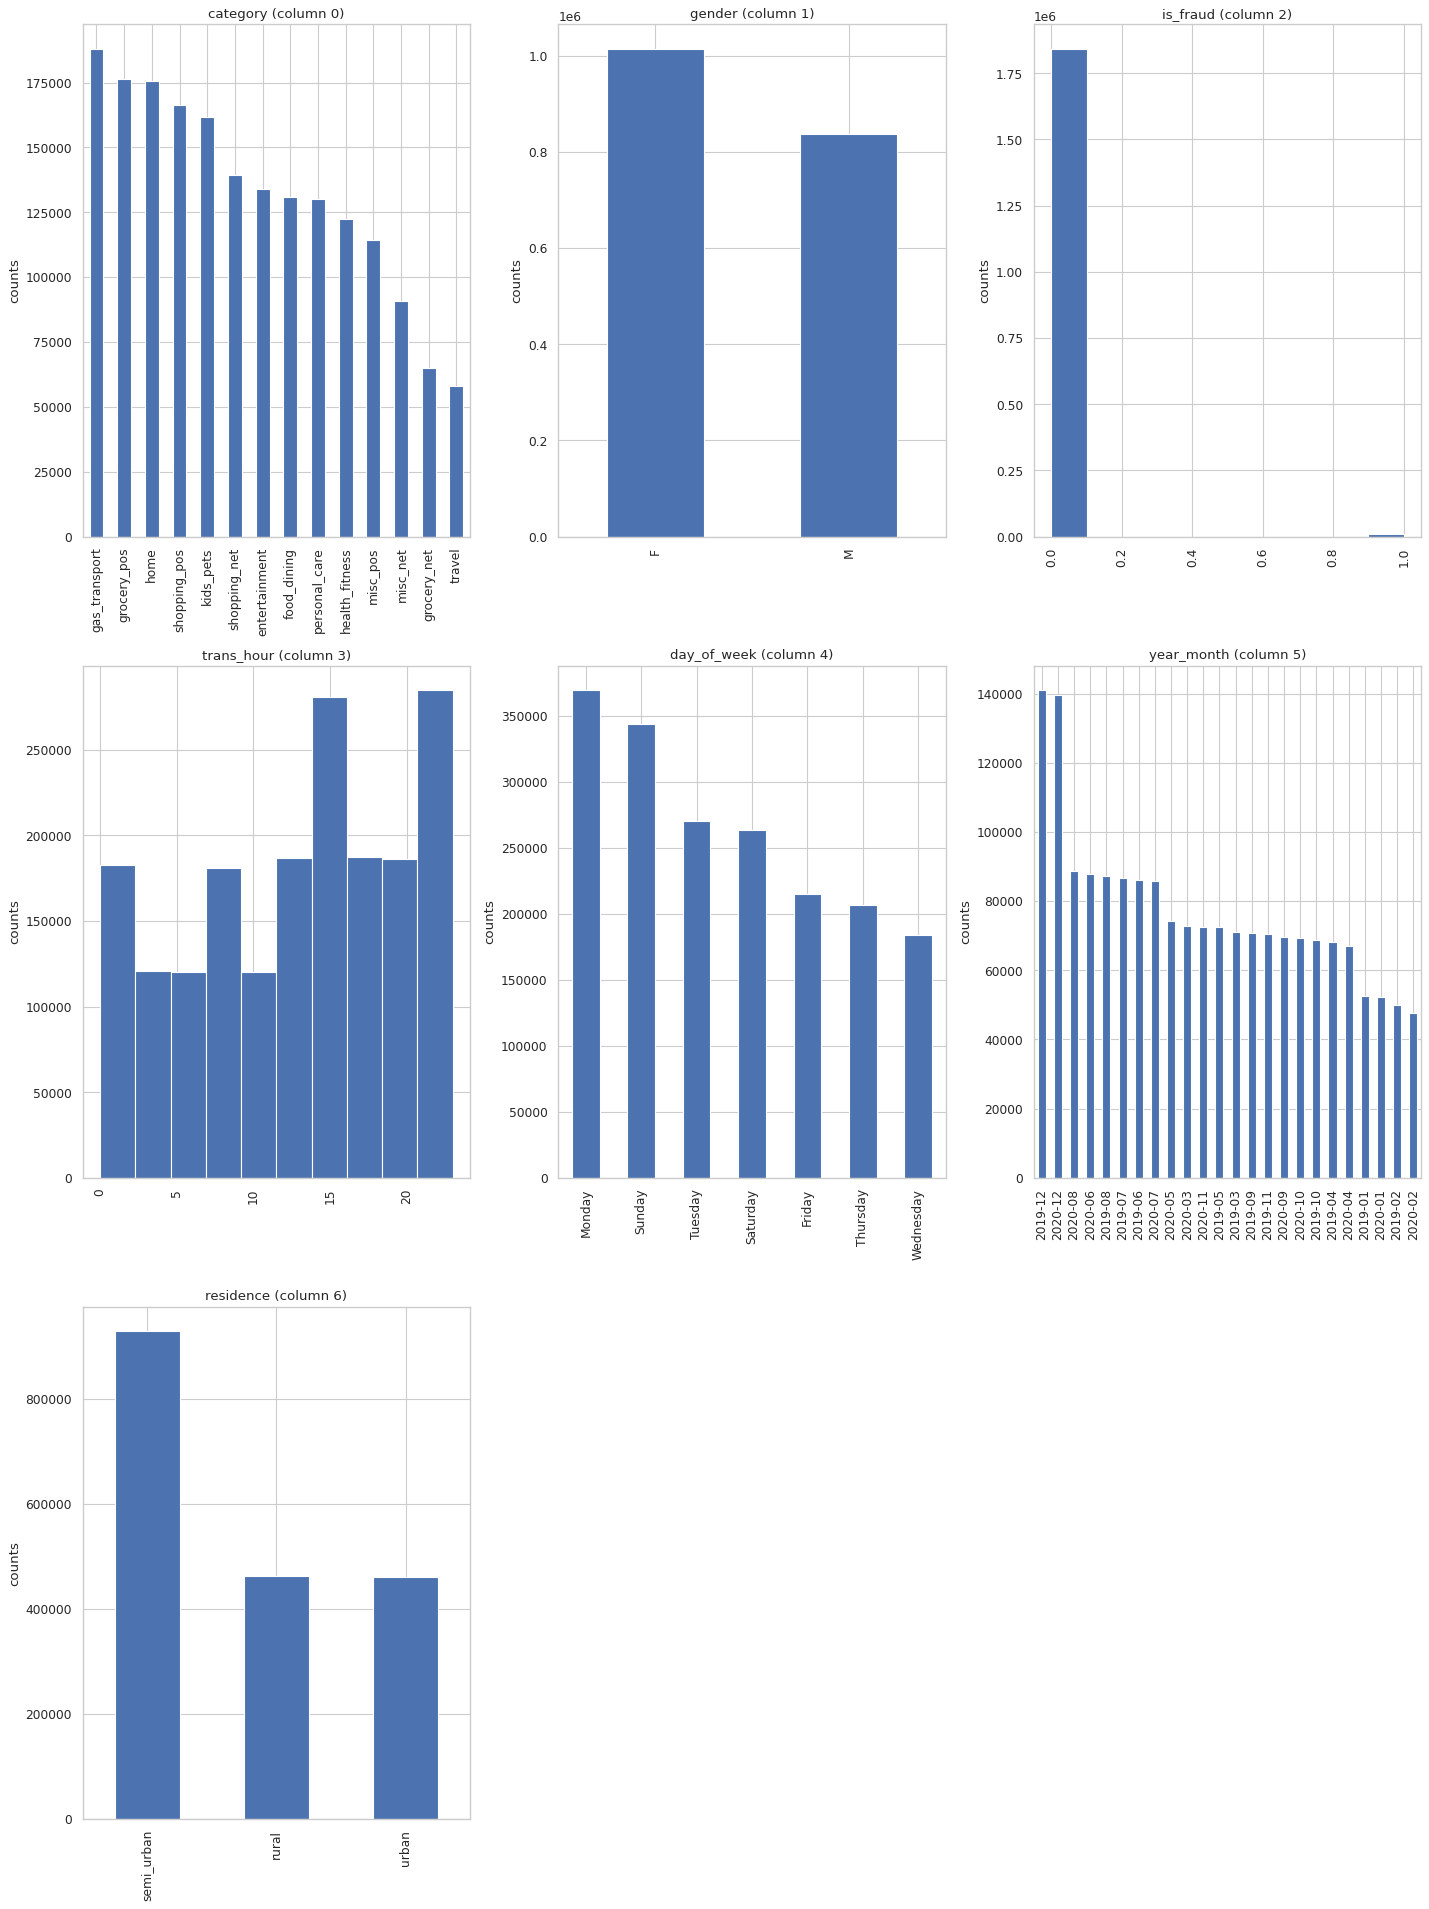

In [36]:
sns.set(style='whitegrid')
plotDistribution(data, 10, 3)

- Gas and transport is where there was the highest number of transaction,  and travel the lowest
- Female made fewer transaction than male
- we can see that there are an imbalance between this dataset between the fraudulent and non-fraudulent transaction
- we can see that more transaction are made in the night
- during the week mre transaction are made monday and sunday
- we can see that at the end of year there more transaction made
- The last but not least we can see that our columns are all right skewed

## Bivariate Analysis¶

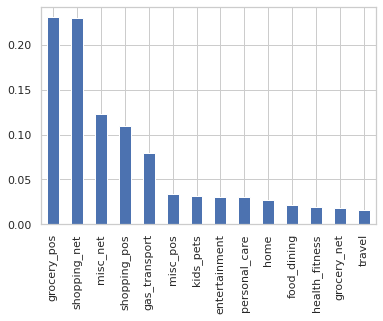

In [37]:
data[(data['is_fraud']==1)].category.value_counts(normalize= True, ascending= False).plot(kind='bar');

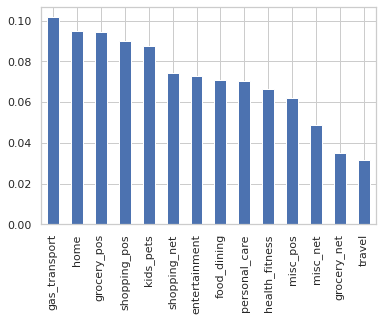

In [38]:
data[(data['is_fraud']==0)].category.value_counts(normalize= True, ascending= False).plot(kind='bar');

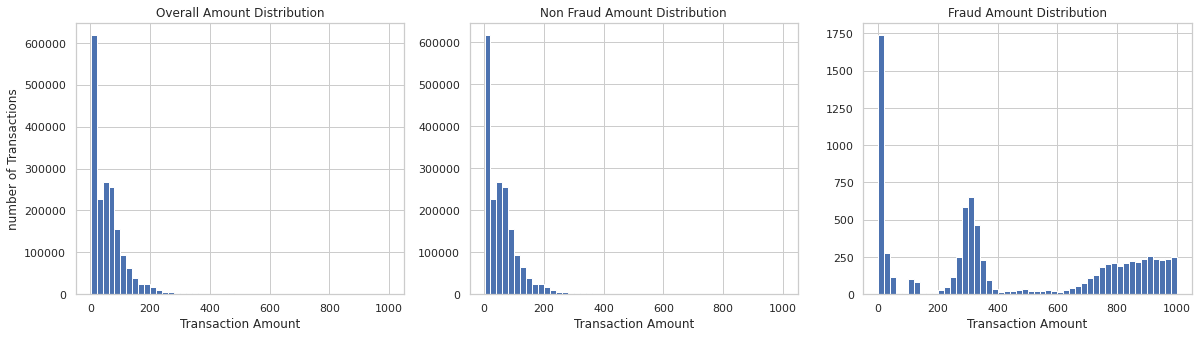

In [39]:

fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(data[data['amt']<=1000]['amt'], bins=50)
ax[1].hist(data[(data['is_fraud']==0) & (data['amt']<=1000)]['amt'], bins=50)
ax[2].hist(data[(data['is_fraud']==1) & (data['amt']<=1000)]['amt'], bins=50)

ax[0].set_title('Overall Amount Distribution')
ax[1].set_title('Non Fraud Amount Distribution')
ax[2].set_title('Fraud Amount Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('number of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

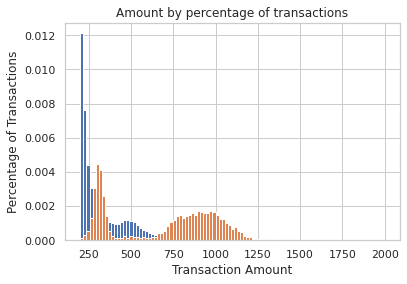

In [40]:
bins = np.linspace(200, 2000, 100)
plt.hist(data[(data['is_fraud']==0)]['amt'], bins,alpha=1, density=True, label='Non Fraud' )
plt.hist(data[(data['is_fraud']==1)]['amt'], bins,alpha=1, density=True, label='Fraud')

plt.title('Amount by percentage of transactions')

plt.xlabel('Transaction Amount')
plt.ylabel('Percentage of Transactions')
plt.show()

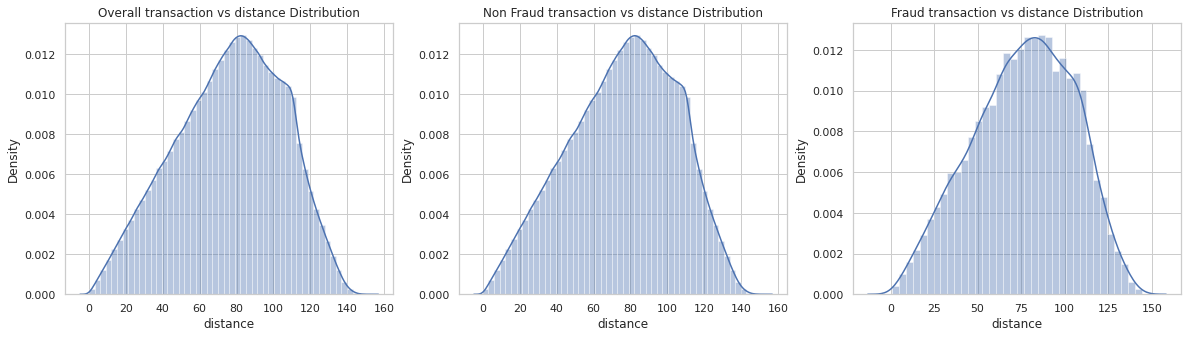

In [41]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(data['distance'], ax= ax[0])#age distributio
sns.distplot(data[(data['is_fraud']==0)].distance, ax= ax[1]) # age distribution for fraudulent transaction
sns.distplot(data[(data['is_fraud']==1)].distance, ax= ax[2]) # age distribution for non fraudulent transaction 

ax[0].set_title('Overall transaction vs distance Distribution')
ax[1].set_title('Non Fraud transaction vs distance Distribution')
ax[2].set_title('Fraud transaction vs distance Distribution')

plt.show()

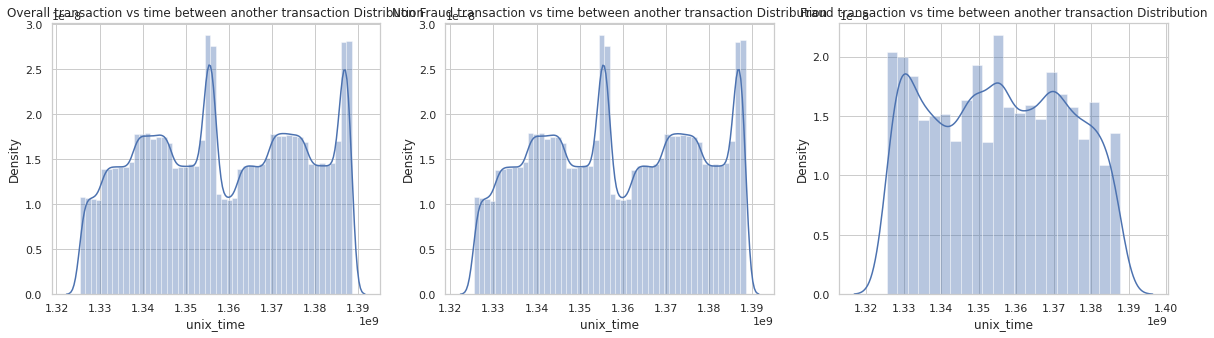

In [42]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(data['unix_time'], ax= ax[0])#age distributio
sns.distplot(data[(data['is_fraud']==0)].unix_time, ax= ax[1]) # age distribution for fraudulent transaction
sns.distplot(data[(data['is_fraud']==1)].unix_time, ax= ax[2])
ax[0].set_title('Overall transaction vs time between another transaction Distribution')
ax[1].set_title('Non Fraud transaction vs time between another transaction Distribution')
ax[2].set_title('Fraud transaction vs time between another transaction Distribution')

plt.show()

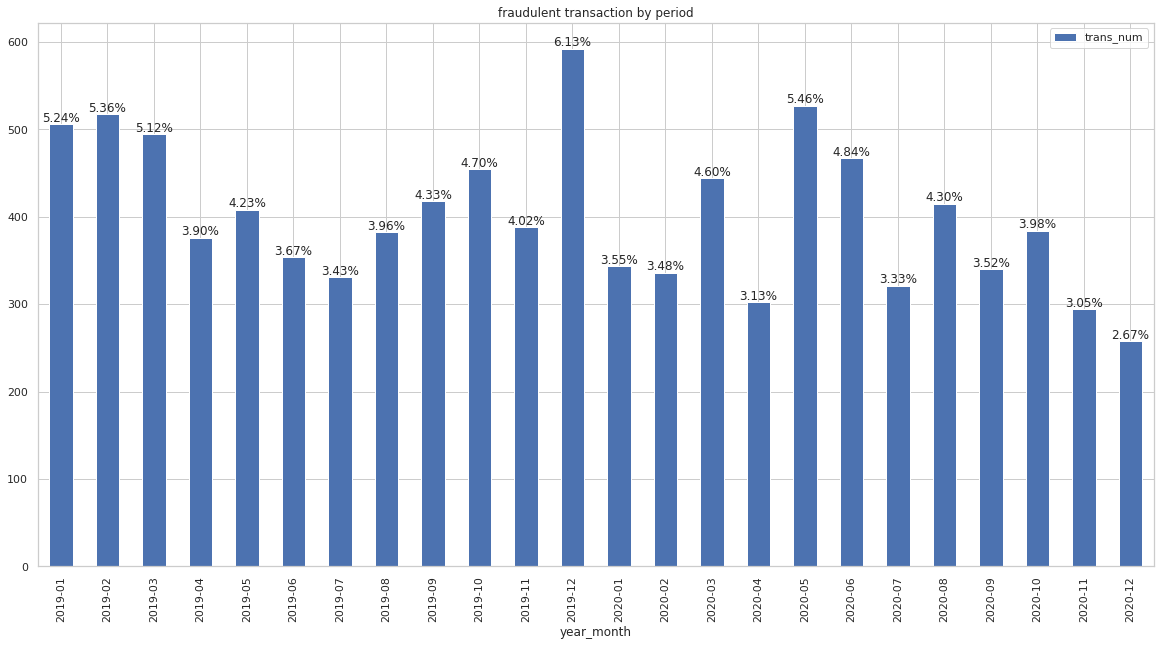

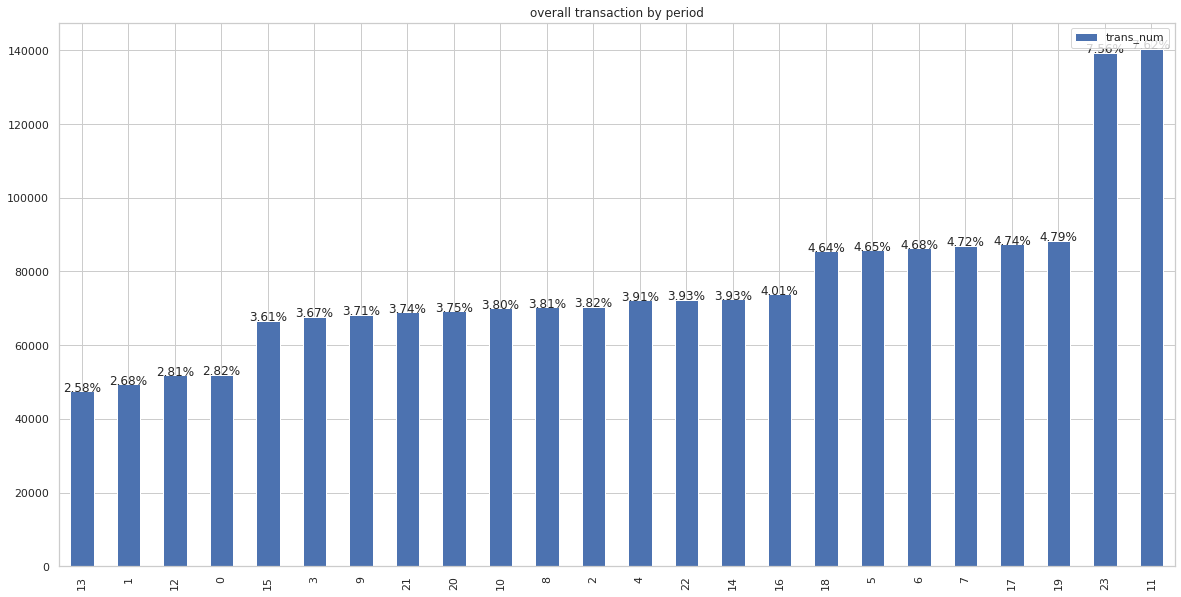

In [43]:
fraud = data[(data['is_fraud']==1)] # fraud df
not_fraud = data[(data['is_fraud']==0)] # non fraud dataframe

ax = fraud.groupby(fraud['year_month'])['trans_num'].nunique().reset_index().set_index('year_month').plot.bar(figsize=(20,10))
ax1 = not_fraud.groupby(not_fraud['year_month'])['trans_num'].nunique().reset_index().sort_values(by=['trans_num']).plot.bar(figsize=(20,10))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(fraud)*100),
            ha="center", fontsize=12)
    
for t in ax1.patches:
    height = t.get_height()
    ax1.text(t.get_x()+t.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(not_fraud)*100),
            ha="center", fontsize=12) 
ax.set_title('fraudulent transaction by period')
ax1.set_title('overall transaction by period')
plt.show()

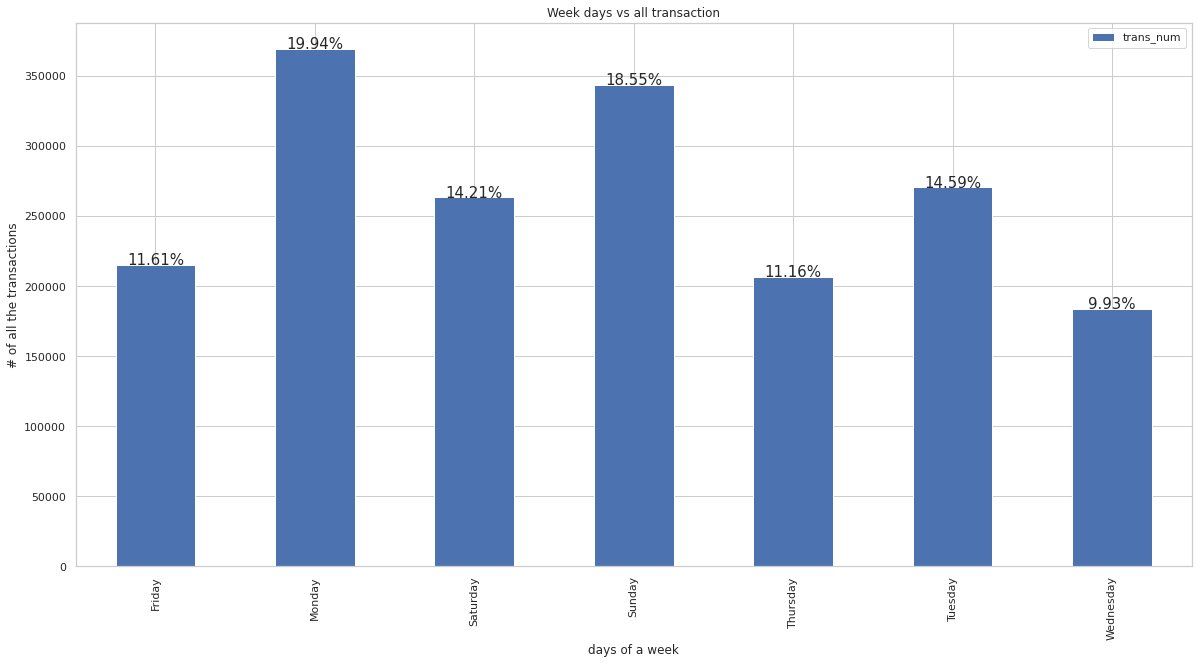

In [44]:
ax = data.groupby(data['day_of_week'])['trans_num'].nunique().reset_index().set_index('day_of_week').plot.bar(figsize=(20,10))
ax.set_ylabel('# of all the transactions')
ax.set_xlabel('days of a week')
ax.set_title('Week days vs all transaction')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=15)
plt.show()

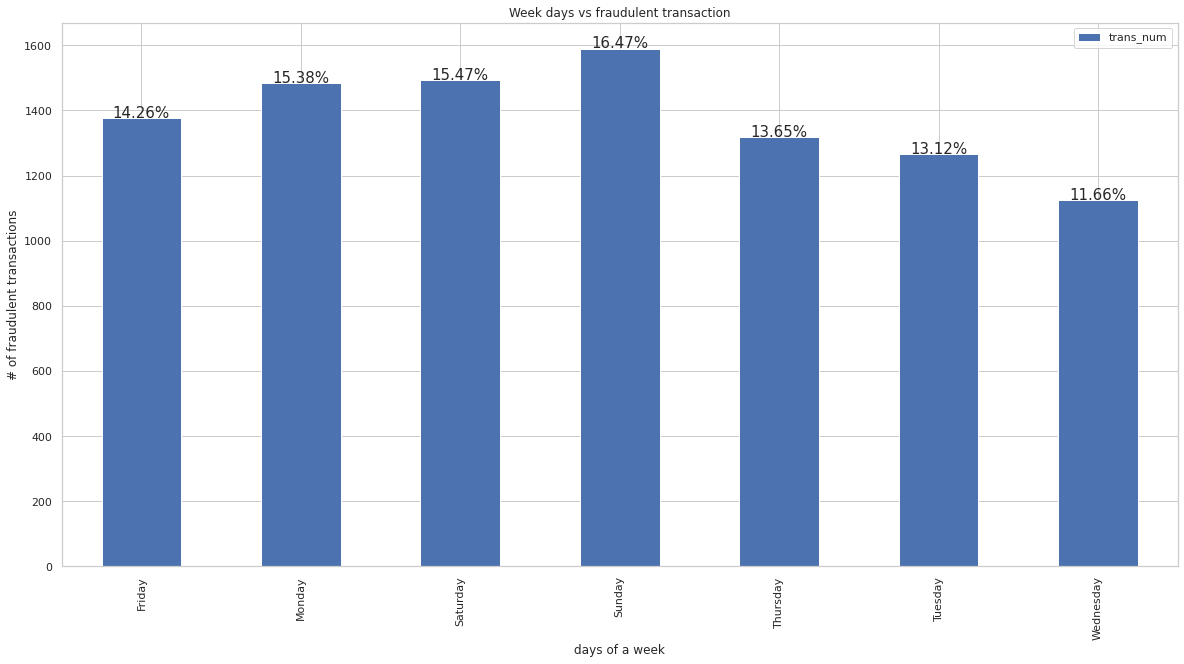

In [45]:
ax = fraud.groupby(fraud['day_of_week'])['trans_num'].nunique().reset_index().set_index('day_of_week').plot.bar(figsize=(20,10))
ax.set_ylabel('# of fraudulent transactions')
ax.set_xlabel('days of a week')
ax.set_title('Week days vs fraudulent transaction')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(fraud)*100),
            ha="center", fontsize=15)
plt.show()

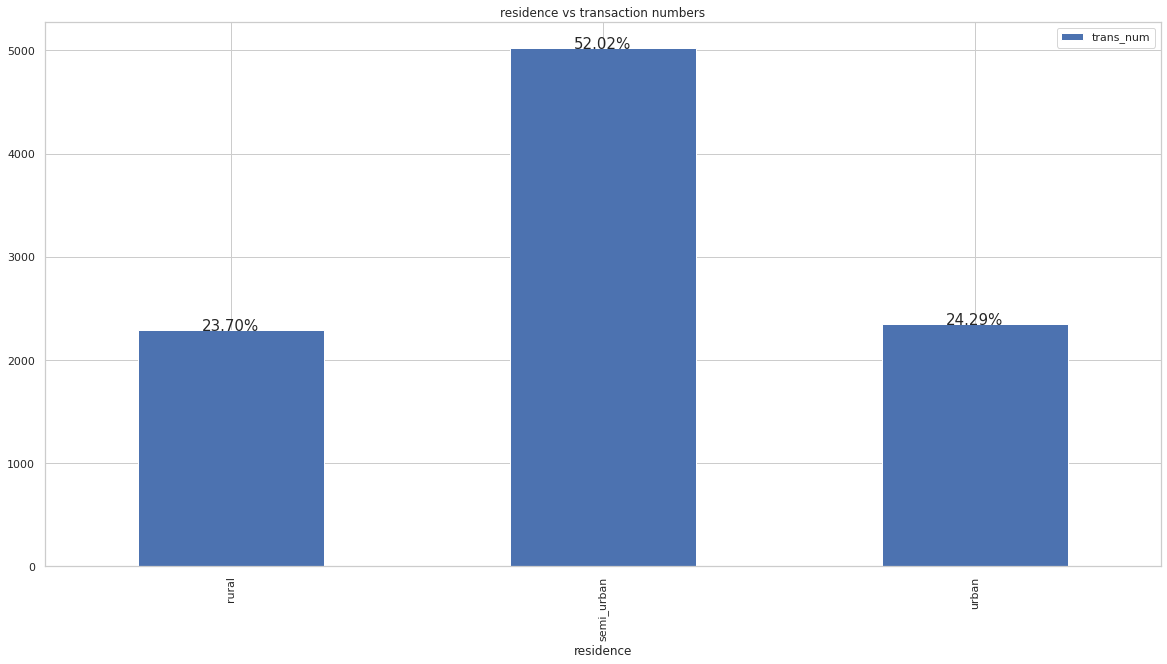

In [46]:
ax = fraud.groupby(fraud['residence'])['trans_num'].nunique().reset_index().set_index('residence').plot.bar(figsize=(20,10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(fraud)*100),
            ha="center", fontsize=15)
ax.set_title('residence vs transaction numbers')
plt.show()

- From the above figures we observed that the POS and ne t purchases have the high fraudulent compared o others 
- There are not a big difference on the distribution of the fraudulent transaction and non fraudulent transacation
- From period transaction, there were more fraudulent transaction in 2019
- In a week, there were  more fraudulent transaction on monday
- In the comparison, using the area, there were more fraudulent transaction in the semi-urban than others

## Multivariate analysis

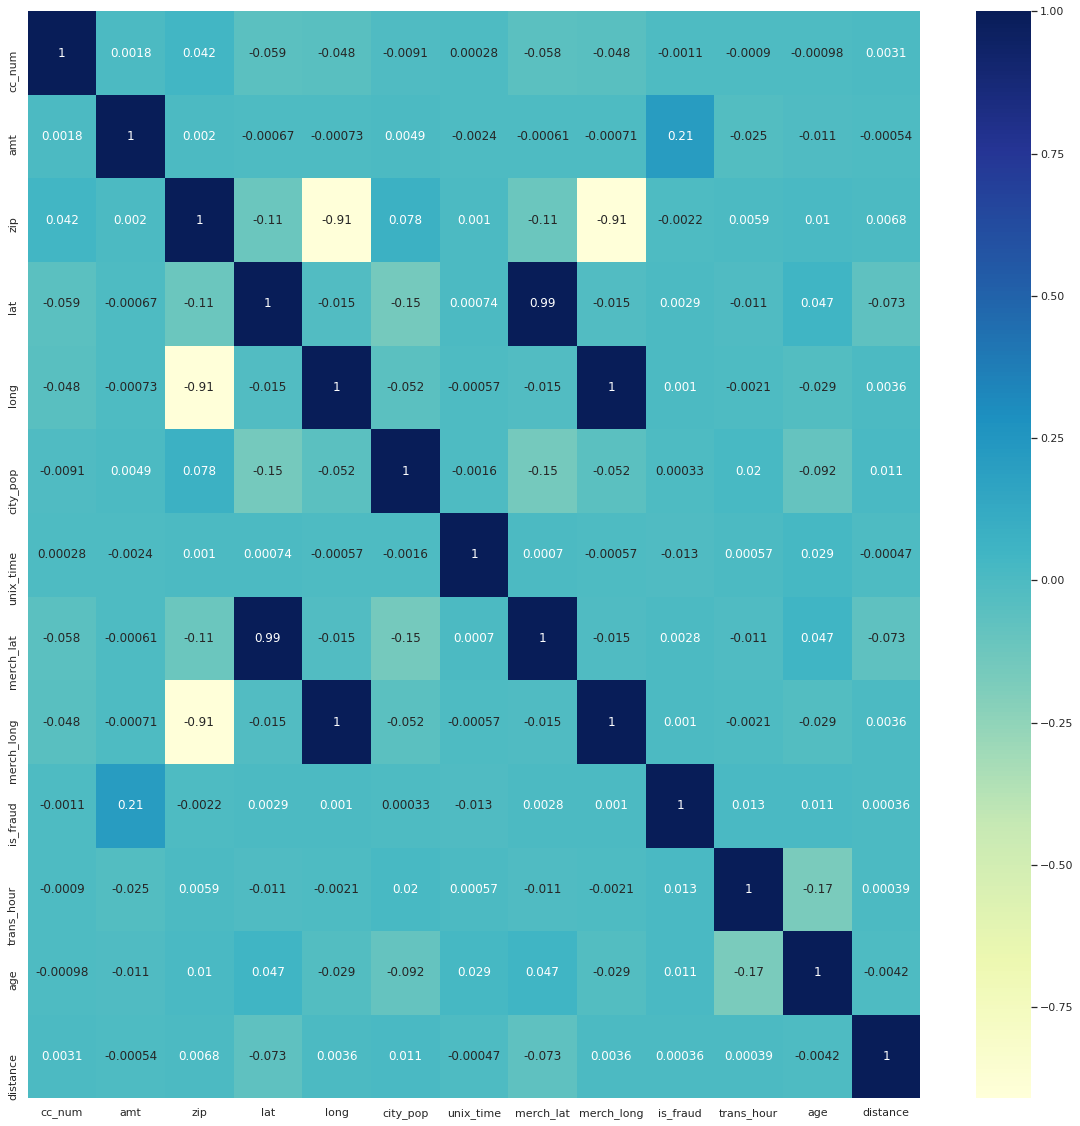

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True,cmap="YlGnBu")
plt.show()

as we can see here there are a high correlation between location (longititude and latitude of the clients and merchant location)

In [48]:
import plotly.express as px 

df2_fraud = data[data['is_fraud'] == 1]

fig = px.scatter_mapbox(df2_fraud, lat="lat", lon="long", hover_name="city",
                         zoom=3, height=500,
                         color="is_fraud",  color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [49]:
dfm_fraud = data[data['is_fraud'] == 1]

fig = px.scatter_mapbox(dfm_fraud, lat="merch_lat", lon="merch_long", hover_name="city",
                         zoom=3, height=500,
                         color="is_fraud",  color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

What we can observe from the above plot is that more fraudulent transaction occurs in the east of the united states, where there were more merchant as well

# Data Preparation

In [50]:
dframe = data.copy()
dframe = dframe.drop(['cc_num','trans_date_trans_time','names', 'merchant','trans_num','street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop','dob', 'merch_lat', 'merch_long','lat_long',
       'merch_ad','job','year_month'],axis=1)

In [51]:
# creating a dummy variable for ome of the categoorical variables and drop the first ones
dummy_var1 = pd.get_dummies(dframe[['category', 'day_of_week', 'gender', 'residence']], drop_first= True)
# adding the resultss to the master dataframe
dframe = pd.concat([dframe, dummy_var1], axis=1)
#dropping the repeated variables
dframe = dframe.drop(['category', 'day_of_week', 'gender', 'residence'],1)

In [54]:
from sklearn.preprocessing import RobustScaler
# select columns to scale 
to_scale = [col for col in dframe.columns if dframe[col].max()>1]
scaler = RobustScaler()
scaled =scaler.fit_transform(dframe[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# replace original columns with scaled columns
for col in scaled:
    dframe[col] = scaled[col]

In [55]:
#make a copy of this dataframe
df = dframe.copy()

# Model Building
__Attention:__ </br>Here,instead of Accuracy we are very much interested on the recall score, because that is the metric that will help us try to capture the most fraudulent transactions.

In [56]:
# import libraries needed for this step
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve # classification metrics
from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # scaling methods

import sklearn.neighbors
from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

# supervised learning algorithms
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier
from xgboost import XGBClassifier
import statsmodels.api as sm # estimates statistical models
from sklearn.feature_selection import RFE #Recursive Feature Elimination for feature selection
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
X = df.drop(['is_fraud'],axis=1) 
y = df['is_fraud'] #target variable

## Test Train Split

In [58]:
#split the dataset into training set and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

## resampling using SMOTE

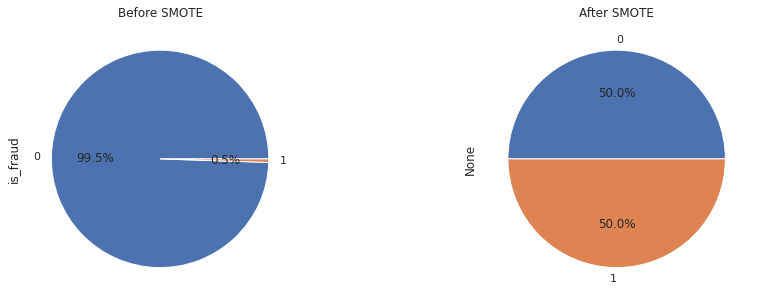

In [59]:
smote = SMOTE()
X_train_new, y_train_new = smote.fit_resample(X_train, y_train.ravel())


# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.pie(autopct='%.1f%%',ax=ax1)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.pie(autopct='%.1f%%',ax=ax2)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [ ]:
# let's see the correlation matrix
plt.figure(figsize= (30, 10))
sns.heatmap(df.corr(), annot=True, cmap= 'GnBu')
plt.show()

We can see that there arent any variable with a high correlation
## Logistic Regression

In [61]:
# logistic regression model
logml = sm.GLM(y_train_new,(sm.add_constant(X_train_new)), family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:              2579924
Model:                            GLM   Df Residuals:                  2579896
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1909e+06
Date:                Sun, 11 Jul 2021   Deviance:                   2.3817e+06
Time:                        08:22:28   Pearson chi2:                 4.01e+17
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.6290      0.007     85.033      0.000       0.615       0.644
amt                         0.4065      0.001    509.183      0.000       0.405       0.408
unix_time                  -0.6132      0.004   -144.407      0.000      -0.622      -0.605
trans_hour                  0.3133      0.003    104.319      0.000       0.307       0.319
age                        -0.0093      0.002     -4.080      0.000      -0.014      -0.005
distance                    0.0142      0.002      5.722      0.000       0.009       0.019
category_food_dining       -1.1488      0.009   -126.148      0.000      -1.167      -1.131
category_gas_transport      0.3174      0.007     44.371      0.000       0.303       0.331
category_grocery_net       -0.4032      0.011    -37.502      0.000      -0.424      -0.382
category_grocery_pos        0.7028      0.007    106.270      0.000       0.690       0.716
category_health_fitness    -1.1987      0.010   -125.978      0.000      -1.217      -1.180
category_home              -1.5042      0.009   -172.782      0.000      -1.521      -1.487
category_kids_pets         -0.8638      0.008   -106.799      0.000      -0.880      -0.848
category_misc_net          -0.2245      0.008    -26.446      0.000      -0.241      -0.208
category_misc_pos          -0.5930      0.009    -67.887      0.000      -0.610      -0.576
category_personal_care     -0.7345      0.008    -87.003      0.000      -0.751      -0.718
category_shopping_net      -0.1281      0.007    -17.216      0.000      -0.143      -0.114
category_shopping_pos      -1.1515      0.008   -138.020      0.000      -1.168      -1.135
category_travel            -0.7863      0.012    -67.948      0.000      -0.809      -0.764
day_of_week_Monday         -1.3746      0.005   -250.376      0.000      -1.385      -1.364
day_of_week_Saturday       -1.0399      0.006   -182.515      0.000      -1.051      -1.029
day_of_week_Sunday         -1.1576      0.005   -214.045      0.000      -1.168      -1.147
day_of_week_Thursday       -0.9647      0.006   -160.420      0.000      -0.977      -0.953
day_of_week_Tuesday        -1.2030      0.006   -207.947      0.000      -1.214      -1.192
day_of_week_Wednesday      -1.0232      0.006   -162.024      0.000      -1.036      -1.011
gender_M                   -0.3300      0.003   -100.756      0.000      -0.336      -0.324
residence_semi_urban       -0.1178      0.004    -31.106      0.000      -0.125      -0.110
residence_urban            -0.4676      0.005   -100.646      0.000      -0.477      -0.459
===========================================================================================
"""

The above all p values are statistically significant </br>
The next step, we are going to check which variables that has high importance for this model than others

### Feature selection using RFE

In [62]:
# look for best describiing features for the logistic regression model using rfe
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train_new, y_train_new)

In [63]:
logreg.fit(X_train_new, y_train_new)
y_test_pred = logreg.predict(X_test)

In [64]:
# have a look on the list of features and the ranking they gets 
list(zip(X_train_new.columns, rfe.support_, rfe.ranking_))

[('amt', False, 4),
 ('unix_time', False, 3),
 ('trans_hour', False, 6),
 ('age', False, 13),
 ('distance', False, 12),
 ('category_food_dining', True, 1),
 ('category_gas_transport', False, 5),
 ('category_grocery_net', False, 8),
 ('category_grocery_pos', True, 1),
 ('category_health_fitness', True, 1),
 ('category_home', True, 1),
 ('category_kids_pets', True, 1),
 ('category_misc_net', False, 9),
 ('category_misc_pos', True, 1),
 ('category_personal_care', True, 1),
 ('category_shopping_net', False, 10),
 ('category_shopping_pos', True, 1),
 ('category_travel', True, 1),
 ('day_of_week_Monday', True, 1),
 ('day_of_week_Saturday', True, 1),
 ('day_of_week_Sunday', True, 1),
 ('day_of_week_Thursday', True, 1),
 ('day_of_week_Tuesday', True, 1),
 ('day_of_week_Wednesday', True, 1),
 ('gender_M', False, 7),
 ('residence_semi_urban', False, 11),
 ('residence_urban', False, 2)]

In [65]:
# extract all the columns selected by rfe as best variable for our model
col = X_train_new.columns[rfe.support_]

In [66]:
#remove those with less important features
X_train_new.columns[~rfe.support_]

Index(['amt', 'unix_time', 'trans_hour', 'age', 'distance',
       'category_gas_transport', 'category_grocery_net', 'category_misc_net',
       'category_shopping_net', 'gender_M', 'residence_semi_urban',
       'residence_urban'],
      dtype='object')

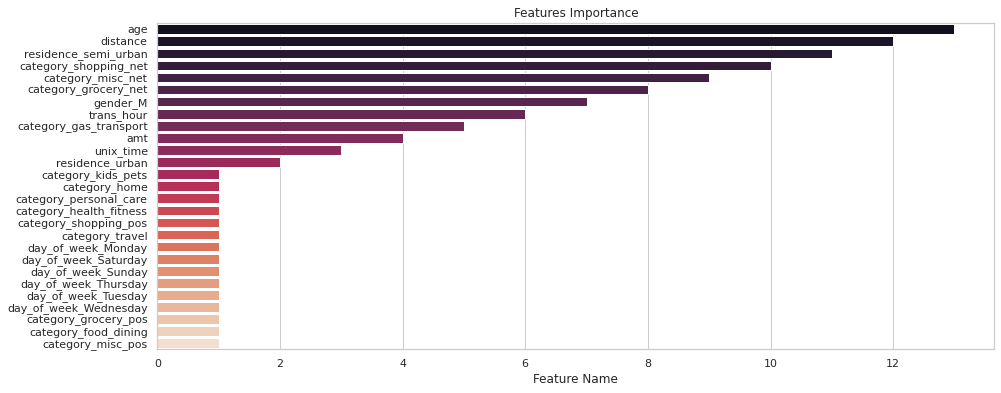

In [67]:
feature_imp = pd.DataFrame(list(zip(X_train_new.columns, rfe.support_, rfe.ranking_)), columns=['variables','selected','rank'])
feature_imp = feature_imp.set_index('variables')

plt.figure(figsize=[15,6])
plt.title('Features Importance')
sns.barplot(x='rank', y=feature_imp.index.values, data=feature_imp, 
            order=feature_imp.sort_values(by='rank', ascending=False).index.values, palette='rocket', )
plt.xlabel('Feature Name');

From the code above we can observe that from the age variable is really important with the rank have over 12, and frim categorykids pets up to category misc pos have a really low rank

In [68]:
# build a logistic regression using only the variables selected using rfe
X_train_sm = sm.add_constant(X_train_new[col])

logml2 = sm.GLM(y_train_new, X_train_sm, family=sm.families.Binomial())

res = logml2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:              2579924
Model:                            GLM   Df Residuals:                  2579908
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.5523e+06
Date:                Sun, 11 Jul 2021   Deviance:                   3.1045e+06
Time:                        08:27:02   Pearson chi2:                 2.59e+06
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.3817      0.004    372.209      0.000       1.374       1.389
category_food_dining       -1.7523      0.008   -231.800      0.000      -1.767      -1.738
category_grocery_pos        0.5060      0.004    126.384      0.000       0.498       0.514
category_health_fitness    -1.8442      0.008   -229.488      0.000      -1.860      -1.828
category_home              -1.8412      0.007   -268.362      0.000      -1.855      -1.828
category_kids_pets         -1.5135      0.006   -238.111      0.000      -1.526      -1.501
category_misc_pos          -1.2143      0.007   -181.403      0.000      -1.227      -1.201
category_personal_care     -1.4012      0.007   -207.221      0.000      -1.414      -1.388
category_shopping_pos      -0.3614      0.005    -78.198      0.000      -0.370      -0.352
category_travel            -1.3758      0.010   -139.416      0.000      -1.395      -1.356
day_of_week_Monday         -1.3744      0.005   -290.668      0.000      -1.384      -1.365
day_of_week_Saturday       -1.0327      0.005   -209.646      0.000      -1.042      -1.023
day_of_week_Sunday         -1.1756      0.005   -251.321      0.000      -1.185      -1.166
day_of_week_Thursday       -0.9994      0.005   -191.252      0.000      -1.010      -0.989
day_of_week_Tuesday        -1.2610      0.005   -249.959      0.000      -1.271      -1.251
day_of_week_Wednesday      -1.0503      0.005   -192.260      0.000      -1.061      -1.040
===========================================================================================
"""

In [69]:
## getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred =y_train_pred.values.reshape(-1)

In [70]:
# put in the dataframe the probability calculated for fraud
y_train_pred_final = pd.DataFrame({'fraud':y_train_new, 'fraud_Prob': y_train_pred})
y_train_pred_final.head()

,fraud,fraud_Prob
0,0,0.137775
1,0,0.586371
2,0,0.530141
3,0,0.868499
4,0,0.594431


In [71]:
# creating new column 'predicted' with 1 if churn_prob > 0.5 else 0
# https://smallbiztrends.com/2019/12/payment-fraud-statistics.html
y_train_pred_final['predicted'] = y_train_pred_final.fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.sample(50)

,fraud,fraud_Prob,predicted
2140001,1,0.625601,1
1211264,0,0.505232,1
2225947,1,0.551336,1
2569747,1,0.496899,0
1126846,0,0.501837,1
1687306,1,0.412403,0
1611654,1,0.265250,0
1877334,1,0.799265,1
1066449,0,0.582090,1
1917122,1,0.551336,1


In [72]:
print(confusion_matrix(y_train_pred_final.fraud, y_train_pred_final.predicted))
print(classification_report(y_train_pred_final.fraud, y_train_pred_final.predicted))

[[ 699566  590396]
 [ 256793 1033169]]
              precision    recall  f1-score   support

           0       0.73      0.54      0.62   1289962
           1       0.64      0.80      0.71   1289962

    accuracy                           0.67   2579924
   macro avg       0.68      0.67      0.67   2579924
weighted avg       0.68      0.67      0.67   2579924



In [73]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[465288  87493]
 [   976   1962]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    552781
           1       0.02      0.67      0.04      2938

    accuracy                           0.84    555719
   macro avg       0.51      0.75      0.48    555719
weighted avg       0.99      0.84      0.91    555719



## Decision Tree

In [74]:
#Building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train_new, y_train_new)
pred_train = dt_clf.predict(X_train_new)

print(confusion_matrix(y_train_new, pred_train))
print(classification_report(y_train_new, pred_train))

[[1236569   53393]
 [  67396 1222566]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95   1289962
           1       0.96      0.95      0.95   1289962

    accuracy                           0.95   2579924
   macro avg       0.95      0.95      0.95   2579924
weighted avg       0.95      0.95      0.95   2579924



In [75]:
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[528184  24597]
 [   810   2128]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    552781
           1       0.08      0.72      0.14      2938

    accuracy                           0.95    555719
   macro avg       0.54      0.84      0.56    555719
weighted avg       0.99      0.95      0.97    555719



## Random-Forest Classifier

In [76]:
#Building Random Forest Model
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,verbose = 1)
rf_clf.fit(X_train_new, y_train_new)
pred_train = rf_clf.predict(X_train_new)

print(confusion_matrix(y_train_new, pred_train))
print(classification_report(y_train_new, pred_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   29.3s finished


[[1274170   15792]
 [  46257 1243705]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98   1289962
           1       0.99      0.96      0.98   1289962

    accuracy                           0.98   2579924
   macro avg       0.98      0.98      0.98   2579924
weighted avg       0.98      0.98      0.98   2579924



In [77]:
pred_test = rf_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.4s finished


[[545060   7721]
 [   846   2092]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    552781
           1       0.21      0.71      0.33      2938

    accuracy                           0.98    555719
   macro avg       0.61      0.85      0.66    555719
weighted avg       0.99      0.98      0.99    555719



### Gradient Boosting Model

In [78]:
#Building XG Boost Model

xbt_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, verbose = 1)
xbt_model.fit(X_train_new, y_train_new)

pred_train = xbt_model.predict(X_train_new)
print(confusion_matrix(y_train_new, pred_train))
print(classification_report(y_train_new, pred_train))

[08:35:50] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:35:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1237146   52816]
 [ 209895 1080067]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90   1289962
           1       0.95      0.84      0.89   1289962

    accuracy                           0.90   2579924
   macro avg       0.90      0.90      0.90   2579924
weighted avg       0.90      0.90      0.90   2579924



In [79]:
pred_test = xbt_model.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[530337  22444]
 [   814   2124]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    552781
           1       0.09      0.72      0.15      2938

    accuracy                           0.96    555719
   macro avg       0.54      0.84      0.57    555719
weighted avg       0.99      0.96      0.97    555719



# Business Impact

## Cost Benefit Analysis

In [91]:
data['ques'] = 1

In [143]:
print(f"Average number of transactions per month: {round(data.groupby(['year_month','ques'])['ques'].sum().mean(),2)}")
print(f"Average number of fraudulent transaction per month: {round(fraud.groupby(['year_month','is_fraud'])['is_fraud'].count().mean(),2)}")
print(f"Average amount per fraud transaction: {round(fraud.amt.sum()/len(fraud),2)}")

Average number of transactions per month: 77183.08
Average number of fraudulent transaction per month: 402.12
Average amount per fraud transaction: 530.66
